In [1]:
from utils.chesscom_downloader import ChesscomDownloader
import matplotlib.pyplot as plt

downloader = ChesscomDownloader(timeout=20.0, sleep_sec=0.2)
username = "joeshift"
df = downloader.load_from_cache(username, timezone="Europe/Berlin")

In [2]:
df.columns

Index(['end_time', 'username', 'opponent_username', 'user_played_as',
       'user_result', 'user_result_simple', 'opponent_result', 'user_rating',
       'opponent_rating', 'rated', 'rules', 'time_class', 'time_control',
       'time_label', 'initial_setup_fen', 'game_url', 'eco_url',
       'tournament_url', 'end_time_local', 'eco', 'moves_normalized',
       'moves_san_json', 'clocks_json', 'n_plies', 'opening_id',
       'matched_plies', 'matched_fullmove', 'matched_prefix_json',
       'opening_fullname', 'opening_name', 'opening_variation',
       'opening_moves_san_json'],
      dtype='object')

In [3]:
df.head()

,end_time,username,opponent_username,user_played_as,user_result,user_result_simple,opponent_result,user_rating,opponent_rating,rated,...,clocks_json,n_plies,opening_id,matched_plies,matched_fullmove,matched_prefix_json,opening_fullname,opening_name,opening_variation,opening_moves_san_json
0,2020-07-10 23:04:33+00:00,JoeShift,BryceMattos,white,win,win,resigned,1078,954,True,...,"[""0:05:04.9"", ""0:05:04.9"", ""0:05:08.4"", ""0:05:...",39,1827,3,2,"[""e4"", ""e5"", ""f4""]",King's Gambit,King's Gambit,,"[""e4"", ""e5"", ""f4""]"
1,2020-07-10 23:22:29+00:00,JoeShift,rhasc,black,win,win,resigned,1254,1194,True,...,"[""0:05:04.9"", ""0:05:02.5"", ""0:05:07.6"", ""0:04:...",116,1109,3,2,"[""e4"", ""c5"", ""Bc4""]",Sicilian Defense: Bowdler Attack,Sicilian Defense,Bowdler Attack,"[""e4"", ""c5"", ""Bc4""]"
2,2023-06-16 14:50:59+00:00,JoeShift,LucBrasi,white,win,win,timeout,1254,678,False,...,"[""0:10:00"", ""0:10:00"", ""0:09:58.8"", ""0:09:46.4...",61,1854,4,2,"[""e4"", ""e5"", ""f4"", ""Nc6""]",King's Gambit Declined: Queen's Knight Defense,King's Gambit Declined,Queen's Knight Defense,"[""e4"", ""e5"", ""f4"", ""Nc6""]"
3,2025-09-04 17:02:43+00:00,JoeShift,Coach-David,white,win,win,checkmated,800,900,False,...,"[null, null, null, null, null, null, null, nul...",83,757,2,1,"[""e4"", ""Nc6""]",Nimzowitsch Defense,Nimzowitsch Defense,,"[""e4"", ""Nc6""]"
4,2025-09-04 17:17:44+00:00,JoeShift,Coach-David,white,win,win,checkmated,800,1200,False,...,"[null, null, null, null, null, null, null, nul...",103,1136,3,2,"[""e4"", ""c5"", ""f4""]",Sicilian Defense: McDonnell Attack,Sicilian Defense,McDonnell Attack,"[""e4"", ""c5"", ""f4""]"


In [8]:
df["rated"].value_counts()

rated
True     62200
False     2888
Name: count, dtype: int64

In [4]:
df["time_label"].value_counts()

time_label
5m         112
10m        106
15m+10s     42
2m+1s        8
5m+5s        2
-            2
1m+1s        1
Name: count, dtype: int64

In [ ]:
df["time_control"].value_counts()

time_control
180          39100
60           18168
180+1         4595
180+2          605
300            450
60+1           420
600            324
300+1          282
600+2          228
600+5          122
1/86400         89
300+2           88
1/259200        79
3600+45         73
30              71
900+2           67
120             65
1200+10         59
900+3           48
480             21
300+5           16
900             13
480+2           12
1500+10         11
900+10           9
1/1209600        8
600+10           7
1/604800         7
420              6
120+1            6
720              5
2700+15          5
2700             4
3+1              4
1/432000         3
1800             3
180+3            3
600+3            3
1/172800         2
240              2
10               1
300+10           1
300+3            1
180+5            1
1200             1
Name: count, dtype: int64

In [10]:
df["white_result"].value_counts()

white_result
win                    30973
resigned               22101
timeout                 3730
checkmated              2602
repetition              2197
agreed                  1678
insufficient            1022
timevsinsufficient       320
stalemate                204
abandoned                101
50move                    71
threecheck                47
bughousepartnerlose       25
kingofthehill             17
Name: count, dtype: int64

In [11]:
df["black_result"].value_counts()

black_result
win                    28623
resigned               24119
timeout                 3655
checkmated              2982
repetition              2197
agreed                  1678
insufficient            1022
timevsinsufficient       320
stalemate                204
abandoned                116
50move                    71
threecheck                47
bughousepartnerlose       31
kingofthehill             23
Name: count, dtype: int64

In [14]:
df["eco"].value_counts()

eco
https://www.chess.com/openings/Reti-Opening-Kingside-Fianchetto-Variation-2.g3-Bg7-3.Bg2-d6-4.O-O                          595
https://www.chess.com/openings/Queens-Pawn-Opening...2.g3-g6-3.Bg2-Bg7-4.Nf3                                               510
https://www.chess.com/openings/Indian-Game-Knights-Variation-East-Indian-Defense...4.Bb2-d5-5.e3-O-O                       490
https://www.chess.com/openings/Caro-Kann-Defense-Two-Knights-Attack-3...dxe4-4.Nxe4-Nf6-5.Ng3                              465
https://www.chess.com/openings/Indian-Game-Knights-Variation-East-Indian-Defense...4.Bb2-O-O-5.e3-d6-6.Be2                 385
                                                                                                                          ... 
https://www.chess.com/openings/Trompowsky-Attack-Classical-Defense-3.Nd2-h6                                                  1
https://www.chess.com/openings/Sicilian-Defense-Open-Accelerated-Dragon-Maroczy-Bind-Formation...13.Rab1-Nd

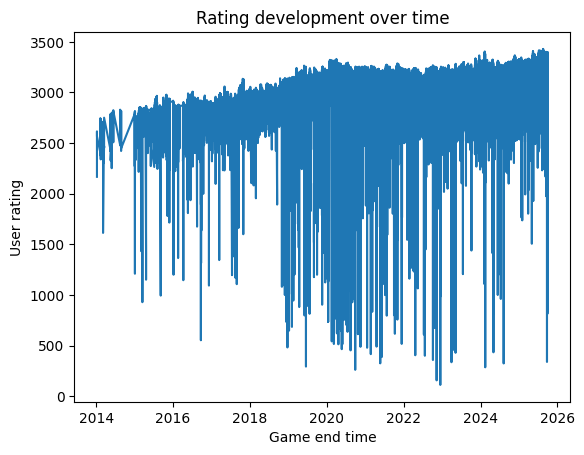

In [8]:
df_sorted = df.sort_values("end_time")

mask = df_sorted["time_class"] == "blitz"
plt.plot(df_sorted.loc[mask, "end_time"], df_sorted.loc[mask, "user_rating"])
plt.xlabel("Game end time")
plt.ylabel("User rating")
plt.title("Rating development over time")
plt.show()

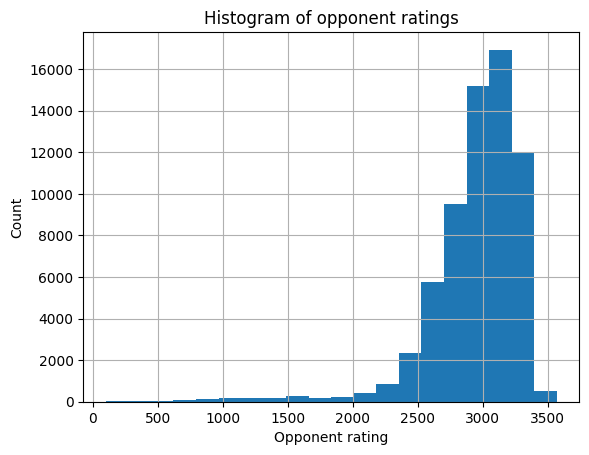

In [4]:
df["opponent_rating"].hist(bins=20)  # 20 equi-width bins
plt.xlabel("Opponent rating")
plt.ylabel("Count")
plt.title("Histogram of opponent ratings")
plt.show()

In [9]:
df["pgn_url"].head(1)

0    [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...
Name: pgn_url, dtype: object